# Simulation of a two-Qubit gate using a resonator as a coupler

Simulating a two-qubit gate using a resonator as a coupler involves modeling the interactions between the two qubits and the resonator to understand how the transfer of quantum information between the qubits is affected. The resonator acts as an intermediary, allowing the qubits to interact with each other in a controlled manner.

----

In this simulation, various parameters such as the resonator frequency, coupling strength, and gate duration can be adjusted to study their impact on the behavior of the two-qubit gate. By using numerical methods, the simulation can predict the output of the gate for a given set of parameters and input states.


-----


The simulation of a two-qubit gate using a resonator as a coupler provides valuable insights into the behavior of quantum systems and can be used to optimize the parameters for specific applications. It is an important tool for the development of quantum technologies and the study of quantum computing.

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%pip install qutip
from qutip import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 66.6 MB/s eta 0:00:00


## Parameters

In [4]:
N = 10

wc = 5.0 * 2 * np.pi
w1 = 3.0 * 2 * np.pi
w2 = 2.0 * 2 * np.pi

g1 = 0.01* 2 * np.pi
g2 = 0.0125 * 2 * np.pi

tlist = np.linspace(0,100,500)

width = 0.5

# resonant SQRT iSWAP gate

T0_1 = 20
T_gate_1 = (1*np.pi)/(4 * g1)

# resonant iSWAP gate

T0_2 = 60

T_gate_2 = (2*np.pi)/(4*g2)

## Operators, Hamiltonian and Initial State

In QuTiP (Quantum Toolbox in Python), "operators" are mathematical objects that represent quantum observables, such as position, momentum, and spin. These observables correspond to physical quantities that can be measured in a quantum system. Operators in QuTiP are represented using the Qobj class, which provides a convenient interface for manipulating and transforming quantum operators.

------


The "Hamiltonian" is a mathematical representation of the total energy of a quantum system. In QuTiP, the Hamiltonian is represented as a Qobj operator, which can be used to study the time evolution of the system. The Hamiltonian operator can be constructed from a combination of other quantum operators and can include terms that represent the interactions between different quantum systems.


------


The "initial state" is the starting point of a quantum simulation in QuTiP. It represents the state of the quantum system at time t=0. In QuTiP, the initial state can be represented as a Qobj operator, which describes the probability distribution over the different possible states of the quantum system. The time evolution of the system can then be studied by using the Hamiltonian and initial state in numerical algorithms that simulate the dynamics of the quantum system.


In [5]:
# cavity operators
a = tensor(destroy(N), qeye(2), qeye(2))
n = a.dag() * a

# operators for qubit 1
sm1 = tensor(qeye(N), destroy(2), qeye(2))
sz1 = tensor(qeye(N), sigmaz(), qeye(2))
n1 = sm1.dag() * sm1

# operators for qubit 2
sm2 = tensor(qeye(N), qeye(2),destroy(2))
sz2 = tensor(qeye(N), qeye(2), sigmaz())
n2 = sm2.dag() * sm2

In [6]:
# hamiltonian using QuTiP

Hc = a.dag() * a
H1 = -0.5 * sz1
H2 = -0.5 * sz2
Hc1 = g1 * (a.dag() * sm1 + a * sm1.dag())
Hc2 = g2 * (a.dag() * sm2 + a * sm2.dag())

H = wc * Hc + w1 * H1 + w2 * H2 + Hc1 + Hc2

In [7]:
print(H)

Quantum object: dims = [[10, 2, 2], [10, 2, 2]], shape = (40, 40), type = oper, isherm = True
Qobj data =
[[-15.70796327   0.           0.         ...   0.           0.
    0.        ]
 [  0.          -3.14159265   0.         ...   0.           0.
    0.        ]
 [  0.           0.           3.14159265 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 279.60174617   0.
    0.        ]
 [  0.           0.           0.         ...   0.         285.88493148
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  298.45130209]]


In [8]:
# intial state : start with one of the qubits in its excited state
psi0 = tensor(basis(N,0), basis(2,1), basis(2,0))

## Ideal two-qubit iSWAP gate

The iSWAP gate is a two-qubit gate that swaps the states of two qubits and applies a phase shift to their superposition. The iSWAP gate is considered an "ideal" gate as it performs the swap and phase shift operations perfectly. In other words, the iSWAP gate is a perfect unitary operation, which means it is reversible and leaves the overall state of the system unchanged.

------


The iSWAP gate is an important building block for quantum computing, as it allows for the manipulation of the quantum states of two qubits. The iSWAP gate can be used to implement quantum algorithms and to build more complex quantum circuits.

-----

The iSWAP gate can be realized using various physical implementations, such as superconducting qubits, trapped ions, and quantum dots. The specifics of the implementation can affect the performance of the iSWAP gate, with deviations from the ideal behavior leading to errors in the quantum computation. Thus, the characterization and optimization of the iSWAP gate is a crucial step in the development of practical quantum computing.

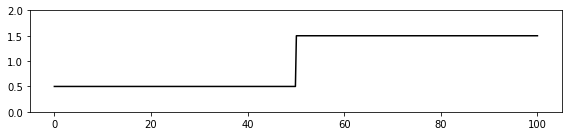

In [9]:
def step_t(w1, w2, t0, width, t):
    """
    Step function that goes from w1 to w2 at time t0
    as a function of t. 
    """
    return w1 + (w2 - w1) * (t > t0)


fig, axes = plt.subplots(1, 1, figsize=(8,2))
axes.plot(tlist, [step_t(0.5, 1.5, 50, 0.0, t) for t in tlist], 'k')
axes.set_ylim(0, 2)
fig.tight_layout()

In [10]:
def wc_t(t, args=None):
    return wc

def w1_t(t, args=None):
    return w1 + step_t(0.0, wc-w1, T0_1, width, t) - step_t(0.0, wc-w1, T0_1+T_gate_1, width, t)

def w2_t(t, args=None):
    return w2 + step_t(0.0, wc-w2, T0_2, width, t) - step_t(0.0, wc-w2, T0_2+T_gate_2, width, t)


H_t = [[Hc, wc_t], [H1, w1_t], [H2, w2_t], Hc1+Hc2]

### Evolve the system

In [11]:
res = mesolve(H_t, psi0, tlist, [], [])

### Plot the results

In [13]:
from numpy import *

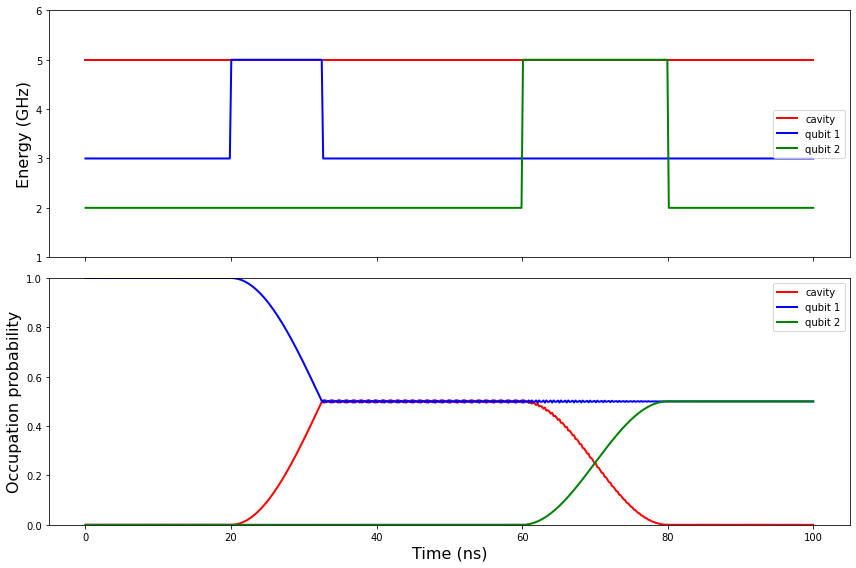

In [14]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

## Inspect the final state

In [15]:
# extract the final state from the result of the simulation
rho_final = res.states[-1]

In [17]:
# trace out the resonator mode and print the two-qubit density matrix
rho_qubits = ptrace(rho_final, [1,2])
print(rho_qubits)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 6.23619654e-05+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j        ]
 [ 0.00000000e+00+0.j          5.00063399e-01+0.j
  -4.99573000e-01+0.01989043j  0.00000000e+00+0.j        ]
 [ 0.00000000e+00+0.j         -4.99573000e-01-0.01989043j
   4.99874239e-01+0.j          0.00000000e+00+0.j        ]
 [ 0.00000000e+00+0.j          0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00+0.j        ]]


In [19]:
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

In [20]:
# compare to the ideal result of the sqrtiswap gate (plus phase correction) for the current initial state
rho_qubits_ideal = ket2dm(tensor(phasegate(0), phasegate(-pi/2)) * sqrtiswap() * tensor(basis(2,1), basis(2,0)))
print(rho_qubits_ideal)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.  0.  0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.  0.  0. ]]


<ipython-input-20-8df80db79b6f>:2: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  rho_qubits_ideal = ket2dm(tensor(phasegate(0), phasegate(-pi/2)) * sqrtiswap() * tensor(basis(2,1), basis(2,0)))


### Fidelity and Concurrence

"Fidelity" is a measure of the similarity between two quantum states. In quantum computing, the fidelity of a quantum gate is a measure of how well the gate approximates the ideal unitary operation it is designed to implement. The fidelity of a quantum gate can be used to assess the performance of the gate and to compare different implementations of the same gate.

-----

"Concurrence" is a measure of the entanglement between two qubits. In quantum computing, entanglement is a key resource that allows for quantum algorithms to provide exponential speedup over classical algorithms. The concurrence of a quantum state is a scalar value that ranges from 0 to 1, with 1 indicating maximum entanglement and 0 indicating no entanglement.

-----

Both fidelity and concurrence are important concepts in quantum computing, as they provide important information about the performance and behavior of quantum systems. The optimization of both the fidelity and concurrence of quantum gates is a critical step in the development of practical quantum computing, as it ensures the reliable operation of quantum algorithms.

In [21]:
fidelity(rho_qubits, rho_qubits_ideal)

0.019895211231108805

In [22]:
concurrence(rho_qubits)

0.9999376138772201

## Dissipative two-qubit iSWAP gate


**Define collapse operators that descrive dissipation**

In [23]:
kappa = 0.0001
gamma1 = 0.005
gamma2 = 0.005

c_ops = [sqrt(kappa) * a, sqrt(gamma1) * sm1, sqrt(gamma2) * sm2]

### Evolve the system

In [24]:
res = mesolve(H_t, psi0, tlist, c_ops, [])

### Plot the results

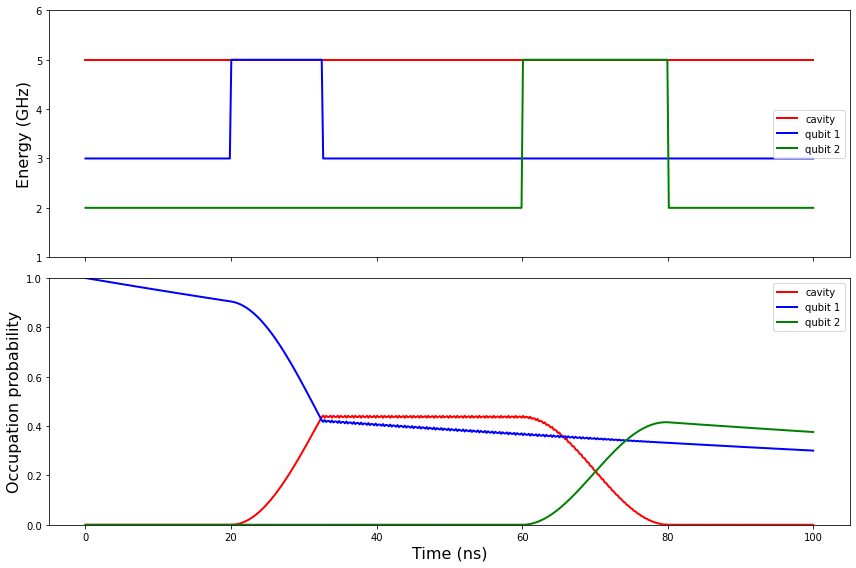

In [25]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

### Fidelity and Concurrence

In [26]:
rho_final = res.states[-1]
rho_qubits = ptrace(rho_final, [1,2])
     

In [27]:
fidelity(rho_qubits, rho_qubits_ideal)
     

0.0

In [28]:
concurrence(rho_qubits)

0.672378603609591

## Two-Qubit iSWAP gate : Finite pulse rise time

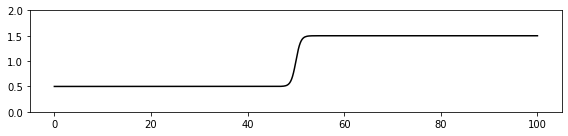

In [29]:
def step_t(w1, w2, t0, width, t):
    """
    Step function that goes from w1 to w2 at time t0
    as a function of t, with finite rise time defined
    by the parameter width.
    """
    return w1 + (w2 - w1) / (1 + exp(-(t-t0)/width))


fig, axes = plt.subplots(1, 1, figsize=(8,2))
axes.plot(tlist, [step_t(0.5, 1.5, 50, width, t) for t in tlist], 'k')
axes.set_ylim(0, 2)
fig.tight_layout()

### Evolve the systems

In [30]:
res = mesolve(H_t, psi0, tlist, [], [])

### Plot the results

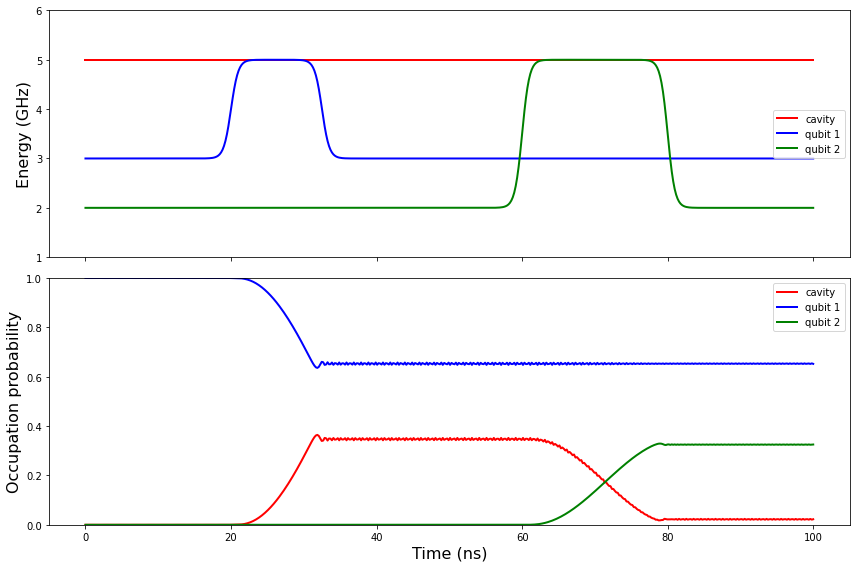

In [31]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

### Fidelity and Concurrence

In [32]:
rho_final = res.states[-1]
rho_qubits = ptrace(rho_final, [1,2])

In [33]:

fidelity(rho_qubits, rho_qubits_ideal)
     

0.17500507713297858

In [34]:
concurrence(rho_qubits)

0.9212264108948581

## Two-qubit iSWAP gate: Finite rise time with overshoot

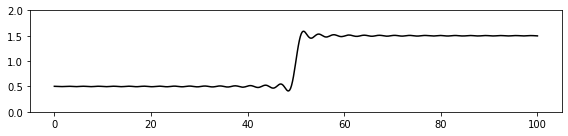

In [35]:
from scipy.special import sici

def step_t(w1, w2, t0, width, t):
    """
    Step function that goes from w1 to w2 at time t0
    as a function of t, with finite rise time and 
    and overshoot defined by the parameter width.
    """

    return w1 + (w2-w1) * (0.5 + sici((t-t0)/width)[0]/(pi))


fig, axes = plt.subplots(1, 1, figsize=(8,2))
axes.plot(tlist, [step_t(0.5, 1.5, 50, width, t) for t in tlist], 'k')
axes.set_ylim(0, 2)
fig.tight_layout()

### Evolve the system

In [36]:
res = mesolve(H_t, psi0, tlist, [], [])

### Plot the results

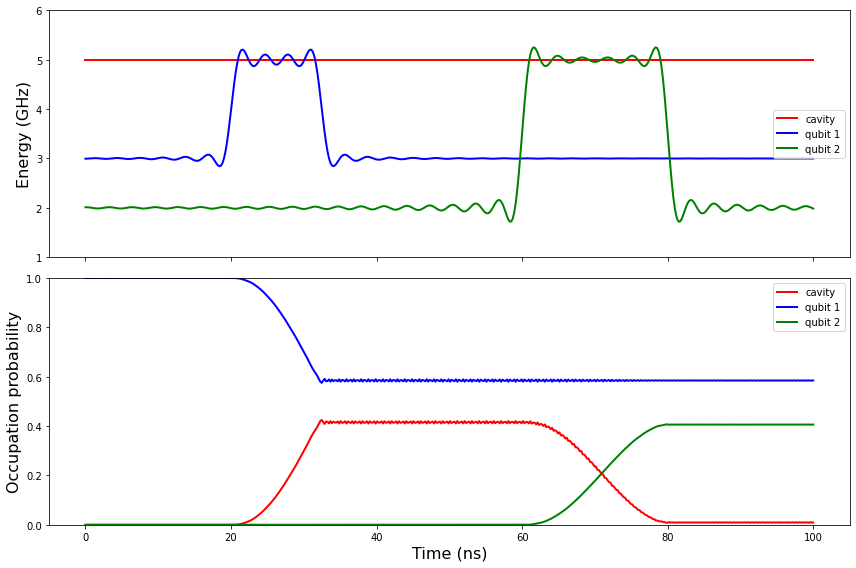

In [37]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

### Fidelity and Concurrence

In [38]:
rho_final = res.states[-1]
rho_qubits = ptrace(rho_final, [1,2])

In [39]:
fidelity(rho_qubits, rho_qubits_ideal)

0.10568180657983031

In [40]:
concurrence(rho_qubits)

0.9743883929068524

## Two-qubit iSWAP gate: Finite pulse rise time and dissipation

In [41]:
# increase the pulse rise time a bit
width = 0.6

# high-Q resonator but dissipative qubits
kappa  = 0.00001
gamma1 = 0.005
gamma2 = 0.005

c_ops = [sqrt(kappa) * a, sqrt(gamma1) * sm1, sqrt(gamma2) * sm2]

### Evolve the system

In [42]:
res = mesolve(H_t, psi0, tlist, c_ops, [])

### Plot results

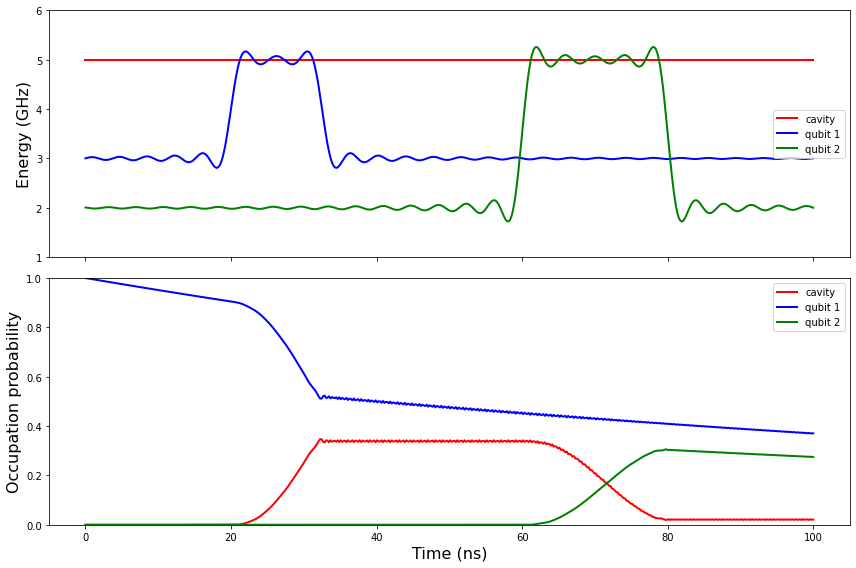

In [43]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

### Fidelity and Concurrence

In [44]:
rho_final = res.states[-1]
rho_qubits = ptrace(rho_final, [1,2])

In [45]:
fidelity(rho_qubits, rho_qubits_ideal)

0.11877417954324533

In [46]:
concurrence(rho_qubits)

0.6261569127329792

## Two-qubit iSWAP gate: Using tunable resonator and fixed-frequency qubits

In [47]:
# reduce the rise time
width = 0.25

def wc_t(t, args=None):
    return wc - step_t(0.0, wc-w1, T0_1, width, t) + step_t(0.0, wc-w1, T0_1+T_gate_1, width, t) \
              - step_t(0.0, wc-w2, T0_2, width, t) + step_t(0.0, wc-w2, T0_2+T_gate_2, width, t)

H_t = [[Hc, wc_t], H1 * w1 + H2 * w2 + Hc1+Hc2]
     

### Evolve the system

In [48]:
res = mesolve(H_t, psi0, tlist, c_ops, [])

### Plot the results

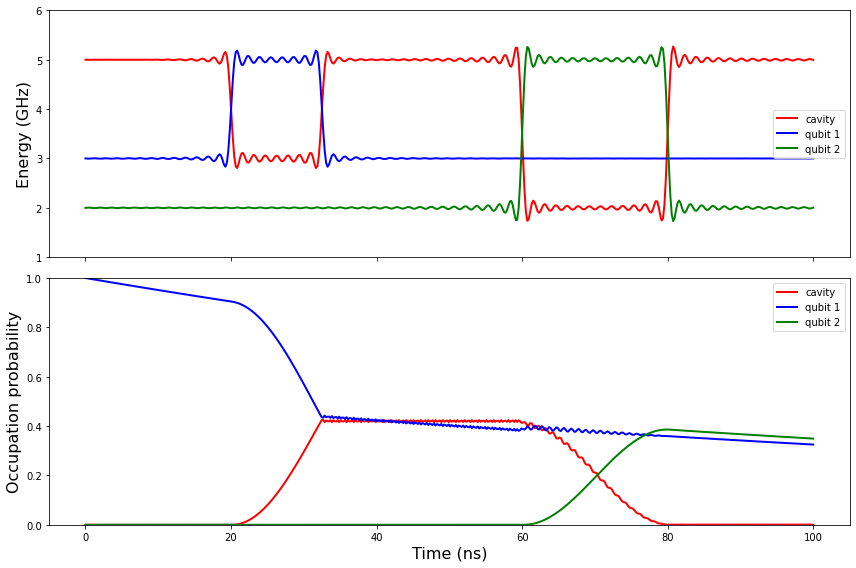

In [49]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

### Fidelity and Concurrence


In [50]:
rho_final = res.states[-1]
rho_qubits = ptrace(rho_final, [1,2])

In [51]:
fidelity(rho_qubits, rho_qubits_ideal)

0.020270450589324064

In [52]:
concurrence(rho_qubits)

0.6736846244599833

## Software Versions

In [53]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.7.1
Numpy,1.21.6
SciPy,1.7.3
matplotlib,3.2.2
Cython,0.29.33
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,7.9.0
Python,"3.8.10 (default, Nov 14 2022, 12:59:47) [GCC 9.4.0]"
OS,posix [linux]
